<div style="
    border: 2px solid #4CAF50; 
    padding: 15px; 
    background-color: #f4f4f4; 
    border-radius: 10px; 
    align-items: center;">

<h1 style="margin: 0; color: #4CAF50;">Statistik im Data Science Bereich (Zentralmaße)</h1>
<h2 style="margin: 5px 0; color: #555;">DSAI</h2>
<h3 style="margin: 5px 0; color: #555;">Jakob Eggl</h3>

<div style="flex-shrink: 0;">
    <img src="https://www.htl-grieskirchen.at/wp/wp-content/uploads/2022/11/logo_bildschirm-1024x503.png" alt="Logo" style="width: 250px; height: auto;"/>
</div>
<p1> © 2024/25 Jakob Eggl. Nutzung oder Verbreitung nur mit ausdrücklicher Genehmigung des Autors.</p1>
</div>
<div style="flex: 1;">
</div>   

# Statistik

Warum Statisik(en) wichtig ist/sind:
* Geben Einblick in die (numerischen) Daten
* Mathematik lässt nur wenig Spielraum für subjektive Interpretationen bzw. (Mis)interpretationen
* Erlauben Vergleich zwischen verschiedenen Datensätzen
* Unterstützen bei der Identifikation von Ausreißern und Anomalien
* Helfen bei der Bestimmung von Trends und Mustern
* Ermöglichen fundierte Entscheidungen basierend auf Daten
* Unterstützen bei der Validierung von Hypothesen und Modellen

<b>Aber:</b>
Statistiken können auch <b>täuschen</b>, wie wir später sehen werden!

Allgemein lassen sich die verschiedenen, für uns interessanten, Größen folgendermaßen gruppieren:
* <b>Lage- und Zentralmaße:</b> Mittelwert, Median, Modus, Geometrisches Mittel, Harmonisches Mittel, Quartile, Quantile
* <b>Streuungsmaße:</b> Varianz, Standardabweichung, Spannweite, Interquartilsabstand

Wir arbeiten (vorerst) wieder mit unserem Titanic Dataset.

In [1]:
import pandas as pd
import os

path = os.path.join("..", "..", "_data", "titanic.csv")

In [2]:
df = pd.read_csv(path, decimal=".", sep=",", header=0, index_col=False)

In [3]:
df

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,14.5000,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN
1305,3,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.5000,0,0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3,0,"Zakarian, Mr. Ortin",male,27.0000,0,0,2670,7.2250,NaN,C,NaN,NaN,NaN


---

## Minimum/Maximum
Der kleinste bzw. größte vorkommende Wert in einer Liste/Serie von Daten. 

In der Statistik und Datenanalyse ist es oft wichtig, die Extrema in einer Datenmenge zu identifizieren. Diese Werte werden als Minimum oder Maximum bezeichnet. Sie sind hilfreich, um Ausreißer (Outlier), i.e. besonders hohe oder besonders niedrige Werte, zu identifizieren.

Eigenschaften:
* Empfindlich gegenüber Ausreißern (--> Quartile bzw. Quantile) (Bsp. Overflow bei Integern)
* Einfache und leicht verständliche Maßzahlen.
* In Kombination mit anderen statistischen Kennzahlen wie dem Mittelwert kann das Minimum bzw. Maximum helfen, die Verteilung der Daten besser zu verstehen.

In [4]:
# Minima des Dataframes berechnen
minima = df.min(numeric_only=True)

print(minima)

pclass      1.0000
survived    0.0000
age         0.1667
sibsp       0.0000
parch       0.0000
fare        0.0000
body        1.0000
dtype: float64


Wir können auch das Minimum/Maximum über Zeilen berechnen, indem wir die <em>axis</em> angeben.

In [5]:
min_of_columns = df.min(axis=0, skipna=True, numeric_only=True)
min_of_rows = df.min(axis=1, skipna=True, numeric_only=True)

In [6]:
min_of_columns

pclass      1.0000
survived    0.0000
age         0.1667
sibsp       0.0000
parch       0.0000
fare        0.0000
body        1.0000
dtype: float64

In [7]:
min_of_rows

0       0.0000
1       0.9167
2       0.0000
3       0.0000
4       0.0000
         ...  
1304    0.0000
1305    0.0000
1306    0.0000
1307    0.0000
1308    0.0000
Length: 1309, dtype: float64

---

## Mittelwert (arithmetisches Mittel)

Der Mittelwert, auch Durchschnitt genannt, ist eine zentrale Tendenz, die den Durchschnittswert einer Datenmenge beschreibt. Er ist die häufigste verwendete statistische Kennzahl. Berechnet wird er, indem man die Summe aller Werte durch die Anzahl der Werte teilt.

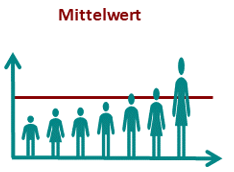

(from https://datatab.de/tutorial/mittelwert-median-modus)

### Berechnung des Mittelwerts

Für eine gegebene Datenmenge $x_1, x_2, \ldots, x_n$ wird der Mittelwert $\bar{x}$ wie folgt berechnet:

$$
\bar{x} = \frac{1}{n} \sum_{i=1}^{n} x_i.
$$

Dabei ist:
- $\bar{x}$ der Mittelwert
- $n$ die Anzahl der Datenpunkte
- $x_i$ der $ i$-te Datenpunkt

### Beispiel1

Angenommen, wir haben die folgenden Datenpunkte: $$2, 4, 6, 8, 10.$$ Der Mittelwert wird wie folgt berechnet:

$$
\bar{x} = \frac{1}{5} (2 + 4 + 6 + 8 + 10) = \frac{30}{5} = 6
$$

Der Mittelwert dieser Datenpunkte ist 6.

### Beispiel2

Angenommen, wir haben die Werte:

$$1, 2, a, 3a, 4, 5, -a, 1, 0, 9$$

und haben einen Mittelwert von 4. Welchen Wert muss a annehmen?

Lösung?

### Beispiel3

Nach einem Test in DSAI ist die Notenverteilung wie folgt:

1|2|3|4|5
:--- | ---: | ---: | ---: | ---:
6|3|6|3|3

Berechne den Mittelwert!

Lösung?

Gibt es eine weitere Möglichkeit?


### Eigenschaften des Mittelwerts

- Der Mittelwert ist empfindlich gegenüber Ausreißern, d.h., extrem hohe oder niedrige Werte können den Mittelwert stark beeinflussen.
- Der Mittelwert ist eine gute Maßzahl für symmetrische Verteilungen ohne Ausreißer.

Der Mittelwert ist ein grundlegendes Konzept in der Statistik und wird häufig verwendet, um zentrale Tendenzen in Datensätzen zu beschreiben.

In [8]:
# Mittelwerte des Dataframes berechnen

mean_of_df = df.mean(skipna=True, numeric_only=True) # (Fast) gleiche Syntax

In [9]:
mean_of_df

pclass        2.294882
survived      0.381971
age          29.881135
sibsp         0.498854
parch         0.385027
fare         33.295479
body        160.809917
dtype: float64

In [10]:
# Auch hier kann der Mittelwert über die Zeilen genommen werden
mean_of_rows = df.mean(axis=1, skipna=True, numeric_only=True)

In [11]:
mean_of_rows

0       40.389583
1       26.244450
2       26.258333
3       45.792857
4       30.091667
          ...    
1304    51.564886
1305     3.690840
1306    48.675000
1307     6.204167
1308     6.645833
Length: 1309, dtype: float64

---

## Geometrisches und Harmonisches Mittel

### Geometrisches Mittel

Das geometrische Mittel ist eine Maßzahl der zentralen Tendenz, die insbesondere bei proportionalen Daten oder Wachstumsraten verwendet wird. Es wird berechnet, indem man das Produkt aller Werte nimmt und daraus die $n$-te Wurzel zieht, wobei $n$ die Anzahl der Werte ist.

#### Berechnung des geometrischen Mittels

Für eine gegebene Datenmenge $x_1, x_2, \ldots, x_n$ wird das geometrische Mittel $\bar{x}_{geom}$ wie folgt berechnet:

$$
\bar{x}_{\text{geom}} = \left( \prod_{i=1}^{n} x_i \right)^{\frac{1}{n}}.
$$

#### Beispiel 1

Angenommen, wir haben die folgenden Datenpunkte: \(2, 8\). Das geometrische Mittel wird wie folgt berechnet:

$$
\bar{x}_{geom} = \sqrt{2 \times 8} = \sqrt{16} = 4
$$

Das geometrische Mittel dieser Datenpunkte ist 4.

#### Beispiel 2

Angenommen, die Wertentwicklung (in Prozent) für eine Aktie pro Monat ist wie folgt:
$$+3\%, -8\%, -10\%, -2\%, -15\%, +5\%, +1\%, \pm 0\%, -5\%, +2\%, +1\%, -3\%.$$
Berechne den durchschnittlichen Anstieg bzw. die durchschnittliche Reduzierung der Aktie in diesem Jahr.

Lösung? 


### Harmonisches Mittel

Das harmonische Mittel ist eine weitere Maßzahl der zentralen Tendenz, die insbesondere bei Verhältniszahlen oder Raten verwendet wird. Es wird berechnet, indem man die Anzahl der Werte durch die Summe der Kehrwerte der Werte teilt.

#### Berechnung des harmonischen Mittels

Für eine gegebene Datenmenge $x_1, x_2, \ldots, x_n$ wird das harmonische Mittel $\bar{x}_{harm}$ wie folgt berechnet:

$$
\bar{x}_{harm} = \frac{n}{\sum_{i=1}^{n} \frac{1}{x_i}}
$$

#### Beispiel 1

Angenommen, wir haben die folgenden Datenpunkte: \(2, 8\). Das harmonische Mittel wird wie folgt berechnet:

$$
\bar{x}_{harm} = \frac{2}{\frac{1}{2} + \frac{1}{8}} = \frac{2}{0.5 + 0.125} = \frac{2}{0.625} = 3.2
$$

Das harmonische Mittel dieser Datenpunkte ist $3.2$.

#### Beispiel 2

Angenommen, bei einer Autofahrt beträgt die Fahrgeschwindigkeit in der ersten Stunde $50 \frac{\text{km}}{\text{h}}$ und in der zweiten Stunde $100 \frac{\text{km}}{\text{h}}$. Wie groß ist die Durchschnittsgeschwindigkeit?

Dieses Beispiel ist sehr einfach und benötigt nur den arithmetischen Mittelwert. Bezieht man sich aber nun nicht auf die Zeit, sondern auf die zurückgelegte Strecke, so ändert sich das Ergebnis drastisch.

Zum Beispiel: Die ersten $100 \textrm{km}$ werden mit $100 \frac{\text{km}}{\text{h}}$ gefahren, die zweiten $100 \textrm{km}$ mit $50 \frac{\text{km}}{\text{h}}$. Wie groß ist nun die Durchschnittsgeschwindigkeit?

*Hinweis:* Klarerweise gilt $v=\frac{s}{t}$.

Lösung?

### Eigenschaften

- Das geometrische Mittel ist besonders nützlich bei Daten, die multiplikative Effekte aufweisen, wie z.B. Wachstumsraten.
- Das harmonische Mittel ist besonders nützlich bei Daten, die Verhältnisse oder Raten darstellen, wie z.B. Geschwindigkeiten.
- Beide Mittelwerte sind weniger empfindlich gegenüber Ausreißern im Vergleich zum arithmetischen Mittel.

In [12]:
# Berechnen des geometrischen Mittels

geometric_mean = df.prod(axis=0, skipna=True, numeric_only=True) ** (1 / len(df)) # macht jedoch für die gegebenen Daten wenig Sinn

/home/tikaiz/miniconda3/envs/dsai/lib/python3.9/site-packages/numpy/_core/_methods.py:56: RuntimeWarning: overflow encountered in reduce
  return umr_prod(a, axis, dtype, out, keepdims, initial, where)


In [13]:
geometric_mean

pclass      0.000000
survived    0.000000
age              inf
sibsp       0.000000
parch       0.000000
fare        0.000000
body        1.551917
dtype: float64

In [14]:
# Berechnen des harmonischen Mittels

from scipy.stats import hmean

harmonic_mean = df.select_dtypes(include='number').apply(lambda x: hmean(x)) # erneut: wenig Sinn für die gegebenen Daten

In [15]:
harmonic_mean

pclass      1.875806
survived    0.000000
age              NaN
sibsp       0.000000
parch       0.000000
fare             NaN
body             NaN
dtype: float64

---

## Median

Der Median ist ein Maß der zentralen Tendenz, das den mittleren Wert einer geordneten Datenmenge beschreibt. Im Gegensatz zum Mittelwert ist der Median weniger empfindlich gegenüber Ausreißern und bietet daher eine robustere Darstellung des Zentrums einer Verteilung.

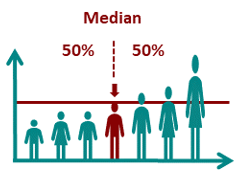

(from https://datatab.de/tutorial/mittelwert-median-modus)

### Berechnung des Medians

Für eine gegebene Datenmenge $x_1, x_2, \ldots, x_n$, die der Größe nach geordnet ist, wird der Median $\tilde{x}$ wie folgt berechnet:

- Wenn $n$ ungerade ist, ist der Median der mittlere Wert:
$$
\tilde{x} = x_{\frac{n+1}{2}}
$$

- Wenn $n$ gerade ist, ist der Median der Durchschnitt der beiden mittleren Werte:
$$
\tilde{x} = \frac{1}{2} (x_{\frac{n}{2}} + x_{\frac{n}{2} + 1})
$$

### Beispiel 1

Angenommen, wir haben die folgenden Datenpunkte: $$9,1,3,5,7.$$ Da die Anzahl der Datenpunkte ungerade ist, ist der Median der mittlere Wert:

$$
\tilde{x} = 5
$$

Der Median dieser Datenpunkte ist 5.

### Beispiel 2

Angenommen, wir haben die Werte: $$1, 6, 5, 4, 2, 3.$$ Da die Anzahl der Datenpunkte gerade ist, ist der Median der Durchschnitt der beiden mittleren Werte:

$$
\tilde{x} = \frac{1}{2} (3 + 4) = 3.5
$$

Der Median dieser Datenpunkte ist 3.5.

### Beispiel 3

Folgende Daten sind gegeben: $$16,5,9,-4,1,a,7,0,16,5.$$


* Für welche(n) Wert(e) $a\in\mathbb{R}$ ist $a$ der Median?
* Was wäre, wenn wir den Wert $7$ entfernen?
* Was wäre, wenn wir den Wert $0$ entfernen?

### Beispiel 4

Nach einem Test in DSAI ist die Notenverteilung wie folgt:

1|2|3|4|5
:--- | ---: | ---: | ---: | ---:
6|3|6|3|3

Berechne den Median!

Lösung?

### Eigenschaften des Medians

- Der Median ist weniger empfindlich gegenüber Ausreißern im Vergleich zum Mittelwert.
- Der Median muss nicht immer ein Wert der Daten sein.
- Der Median teilt die Datenmenge in zwei Hälften, wobei 50% der Werte kleiner und 50% der Werte größer als der Median sind.
- Der Median ist eine gute Maßzahl für asymmetrische Verteilungen oder Verteilungen mit Ausreißern.
- Der Median kann aber auch sehr instabil sein: Bestehen die Daten nur aus Ausreißern (hohe Varianz), dann ist der Median sehr instabil. Beispiel: Daten sind gleich oft $-1000$ und $1000$ (und keine anderen Werte). Dann ist der Median $0$, fügt man aber einen Wert $x\notin[-1000,1000]$ hinzu, so ist der Median $\pm 1000$.

In [16]:
# Berechnen von Median (Erneut (fast) identische Syntax)
median_of_df = df.median(skipna=True, numeric_only=True)

In [17]:
median_of_df

pclass        3.0000
survived      0.0000
age          28.0000
sibsp         0.0000
parch         0.0000
fare         14.4542
body        155.0000
dtype: float64

---

## Modus/Modalwert

Der **Modus** oder **Modalwert** ist ein Maß der zentralen Tendenz, das den häufigsten Wert in einer Datenmenge beschreibt. Im Gegensatz zum Mittelwert und Median, die auf die Ordnung oder Durchschnittlichkeit der Werte abzielen, gibt der Modus denjenigen Wert an, der am häufigsten auftritt. Der Modus ist besonders nützlich für **kategoriale** bzw. **nominale** Daten oder diskrete Verteilungen, kann aber auch auf stetige Daten angewendet werden.

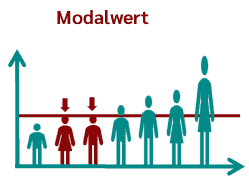

(from https://datatab.de/tutorial/mittelwert-median-modus)

### Berechnung des Modus

Für eine gegebene Datenmenge $x_1, x_2, \ldots, x_n$, wird der Modus $\hat{x}$ bestimmt, indem man den Wert sucht, der am häufigsten vorkommt:

### Beispiel 1

Angenommen, wir haben die folgenden Datenpunkte: 99, **86**, 87, 88, 111, **86**, 103, 87, 94, 78, 77, 85, **86**

Der Wert 86 tritt dreimal auf, häufiger als jeder andere Wert. Daher ist der Modus:

$$
\hat{x} = 86.
$$

Der Modus dieser Datenpunkte ist 86.

### Beispiel 2

Angenommen, wir haben folgende Daten: **7**, 8, 10, **12**, **7**, **12**.

In diesem Fall gibt es zwei Werte, die jeweils zweimal auftreten (7 und 12). Diese Datenmenge ist **bimodal**, und die beiden Modi sind:

$$
\hat{x}_1 = 7 \quad \text{und} \quad \hat{x}_2 = 12
$$

### Beispiel 4

Nach einer Umfrage zur Lieblingsfrucht der Schülerinnen und Schüler ist die Häufigkeitsverteilung wie folgt:

Frucht | Apfel | Banane | Orange
:--- | ---: | ---: | ---: 
Häufigkeit | 11 | 8 | 3 

Der Modus ist:

$$
\hat{x} = \text{Apfel}.
$$

### Eigenschaften des Modus

- Der Modus ist besonders nützlich bei kategorialen Daten.
- Eine Datenmenge kann **einen** Modus (unimodal), **zwei** Modi (bimodal) oder **mehrere** Modi (multimodal) haben.
- Der Modus kann auch für stetige Verteilungen geschätzt werden, zum Beispiel durch Histogramme oder modale Klassen.
- Im Gegensatz zu Median und Mittelwert kann der Modus stark von der Verteilung abhängen und ist nicht immer eindeutig.
- Der Modus ist empfindlich gegenüber kleinen Veränderungen in den Daten, insbesondere wenn die Häufigkeiten der Werte nahe beieinanderliegen.
- Der Modus ist stabil gegenüber Ausreißern, solange diese die Häufigkeitsverteilung nicht stark beeinflussen.

In [18]:
# Der Modus kann wie folgt berechnet werden
mode_of_df = df.mode(numeric_only=True).iloc[0]

In [19]:
mode_of_df

pclass       3.00
survived     0.00
age         24.00
sibsp        0.00
parch        0.00
fare         8.05
body         1.00
Name: 0, dtype: float64

---

## Quartile und Quantile

Quartile und Quantile sind zentrale Konzepte in der Statistik, die dabei helfen, eine Datenmenge in Abschnitte zu unterteilen, um deren Verteilung zu beschreiben.

#### Quartile

Quartile unterteilen eine geordnete Datenreihe in vier gleich große Teile und ermöglichen so eine anschauliche Darstellung der Datenverteilung. Es gibt drei Schlüsselwerte:

- **Erstes Quartil (Q1)**: Der Wert, unter dem 25 % der Daten liegen, auch bekannt als unteres Quartil.
- **Zweites Quartil (Q2)**: Der Median, der die Daten in zwei Hälften teilt, unter dem 50 % der Werte liegen.
- **Drittes Quartil (Q3)**: Der Wert, unter dem 75 % der Daten liegen, auch als oberes Quartil bezeichnet.

Diese Quartile bieten eine nützliche Übersicht darüber, wie die Daten gestreut sind und helfen, ungewöhnliche Werte (Ausreißer) zu erkennen.

#### Quantile

Quantile erweitern das Konzept der Quartile und erlauben eine flexiblere Aufteilung der Daten in beliebig viele Abschnitte. Ein p-Quantil bezeichnet den Wert, unter dem ein bestimmter Prozentsatz \(p\) der Daten liegt. Beispiele hierfür sind:

- **0.25-Quantil**: Entspricht dem ersten Quartil (Q1).
- **0.50-Quantil**: Entspricht dem Median (Q2).
- **0.75-Quantil**: Entspricht dem dritten Quartil (Q3).

Das Besondere an Quantilen ist, dass \(p\) jede beliebige Zahl zwischen 0 und 1 sein kann. So gibt es beispielsweise auch ein \(0.90\)-Quantil, das den Punkt markiert, unter dem 90 % der Daten liegen.

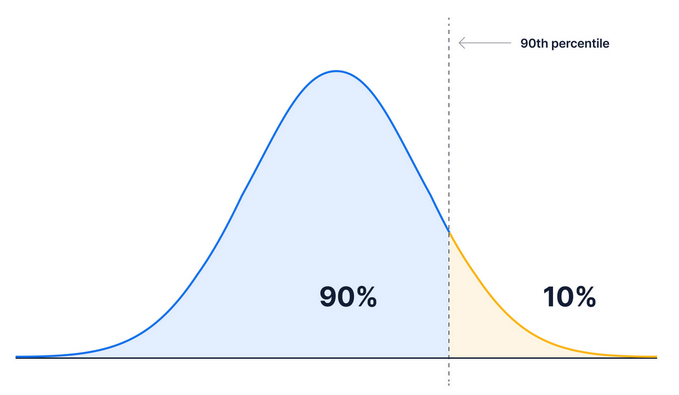

(from https://www.timescale.com/blog/how-percentiles-work-and-why-theyre-better-than-averages/)

Durch die flexible Wahl von \(p\) erlauben Quantile eine feinere Analyse der Datenverteilung, was tiefergehende Einblicke in deren Struktur ermöglicht.

Die Berechnung von $p$-Quantilen (auch *$p$-Perzentile* genannt) händisch ist nicht relevant.

Die Berechnung von Quartilen erfolgt ähnlich wie bei der Median Bestimmung. Zur Demonstrierung dienen nun die folgenden Beispiele.

#### Beispiel1

Betrachten wir die Zahlenreihe: 
$$10, 12, 7, 8, 1, 14, 3, 4, 9, 13.$$

* Erstes Quartil (Q1): 4 (25 % der Daten liegen unter diesem Wert).
* Zweites Quartil (Q2): 8,5 (der Median teilt die Daten in zwei Hälften).
* Drittes Quartil (Q3): 12 (75 % der Daten liegen unter diesem Wert).

#### Beispiel 2

Angenommen, wir haben die folgenden Datenpunkte:
$$5, 7, 7, 8, 12, 14, 14, 14, 19, 21, 24, 25, 25, 27, 32, 33, 34, 36, 40, 45.$$

* Erstes Quartil (Q1): Hier liegt der Wert bei 13. 25 % der Werte in der Datenreihe sind kleiner oder gleich 13.
* Zweites Quartil (Q2): Der Median liegt bei 22.5. 50 % der Datenpunkte liegen unter diesem Wert.
* Drittes Quartil (Q3): 32.5 ist der Wert, über dem 25 % der Daten liegen.

In dieser Datenreihe ist der Bereich zwischen dem ersten und dritten Quartil relativ groß, was darauf hinweist, dass die mittleren 50 % der Daten weit gestreut sind.

#### Beispiel 3

Angenommen, wir betrachten die jährlichen Einkommen einer Population (in Tausend Euro):
$$15, 18, 22, 25, 25, 30, 32, 35, 38, 40, 45, 50, 55, 60, 65, 70, 75, 80, 90, 100.$$

* Erstes Quartil (Q1): 27.5. Das bedeutet, 25 % der Bevölkerung verdienen 27.500 Euro oder weniger im Jahr.
* Median (Q2): 42.5. 50 % der Bevölkerung verdienen weniger als 42.500 Euro im Jahr.
* Drittes Quartil (Q3): 67.5. 75 % der Bevölkerung verdienen weniger als 67.500 Euro jährlich.

Diese Daten zeigen eine recht breite Einkommensverteilung mit deutlichen Unterschieden im oberen Bereich. Erneut ist der Abstand zwischen erstem und drittem Quartil recht groß, was auf eine signifikante Streuung zwischen den mittleren Einkommen hinweist.

#### Eigenschaften und Nutzen

- Quartile und Quantile sind widerstandsfähiger gegenüber Ausreißern als der Durchschnitt, da sie die Datenstruktur nicht durch extreme Werte verzerren.
- Sie bieten eine detaillierte und präzise Beschreibung der Verteilung, was besonders in der Explorationsphase von Daten hilfreich ist.

In der deskriptiven Statistik sind Quartile und Quantile unentbehrlich, um Daten strukturiert zu analysieren und aussagekräftige Visualisierungen zu erstellen.

In [20]:
# Berechnen wir nun Quantile im Dataset

first_quartile = df.quantile(0.25, axis=0, numeric_only=True, interpolation='midpoint') # ACHTUNG: Interpolation beachten! Siehe Dokumentation

In [21]:
first_quartile

pclass       2.0000
survived     0.0000
age         21.0000
sibsp        0.0000
parch        0.0000
fare         7.8958
body        72.0000
Name: 0.25, dtype: float64

In [22]:
# Selbiges funktioniert auch mit beliebigen p-Quantilen

p = 0.42

quantile_p = df.quantile(p, axis=0, numeric_only=True, interpolation='midpoint')


In [23]:
quantile_p

pclass        2.00
survived      0.00
age          25.00
sibsp         0.00
parch         0.00
fare         12.35
body        130.50
Name: 0.42, dtype: float64

In [24]:
# Bzw. können wir natürlich auch direkt mehrere Quantile berechnen

quantiles = df.quantile([0.25, 0.375, 0.5, 0.625, 0.75], axis=0, numeric_only=True, interpolation='midpoint')

In [25]:
quantiles

,pclass,survived,age,sibsp,parch,fare,body
0.250,2.0,0.0,21.0,0.0,0.0,7.8958,72.0
0.375,2.0,0.0,24.0,0.0,0.0,10.0083,120.0
0.500,3.0,0.0,28.0,0.0,0.0,14.4542,155.0
0.625,3.0,1.0,32.0,0.0,0.0,24.1500,190.0
0.750,3.0,1.0,39.0,1.0,0.0,31.2750,256.0


In [26]:
# Man kann natürlich auch wieder über die Zeilen gehen (macht halt rein statistisch wenig Sinn)

row_quantiles = df.quantile([0.25, 0.375, 0.5, 0.625, 0.75], axis=1, numeric_only=True, interpolation='midpoint')

In [27]:
row_quantiles

,0,1,2,3,4,5,6,7,8,9,...,1299,1300,1301,1302,1303,1304,1305,1306,1307,1308
0.250,0.5,1.0,1.0,1.0,1.0,0.500,1.0,0.0,1.0000,0.0000,...,0.5000,1.0000,0.0000,0.0,0.0,0.5000,0.0,0.0000,0.0000,0.0000
0.375,0.5,1.0,1.0,1.5,1.0,0.500,1.0,0.0,1.0000,0.5000,...,0.5000,1.0000,1.5000,0.0,0.0,2.0000,0.5,1.5000,0.0000,0.0000
0.500,1.0,1.0,1.5,2.0,1.5,1.000,1.0,0.0,1.5000,1.0000,...,2.0000,2.0000,3.0000,0.0,0.0,3.0000,1.0,3.0000,1.5000,1.5000
0.625,15.0,1.5,2.0,16.0,13.5,13.775,32.0,0.5,26.7396,11.5000,...,8.7271,8.7271,5.1125,1.5,1.5,8.7271,2.0,5.1125,5.1125,5.4375
0.750,15.0,1.5,2.0,82.5,13.5,13.775,32.0,0.5,26.7396,35.7521,...,8.7271,8.7271,26.3625,3.0,3.0,14.4771,3.0,16.8625,5.1125,5.4375
